In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
import time

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
# sns.set()


# Ignore useless warnings (see SciPy issue #5998)
# import warnings
# warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [2]:
def plot_hist(dataFrame, feature, title='Histogram'):
    sns.set(style="ticks", color_codes=True)
    sns.distplot(dataFrame[feature], color='red', kde=False, bins=5)

    plt.title(title)
    plt.xlim(-0.5, 1.5)
    plt.tight_layout();

    # plt.savefig('./imgs/barplot_price_bin.png', dpi=300);

# House Price Prediction [Binary]


## Table of content
* [Data analysis](#data-analysis)
* [Data processing](#data-processing)
* [Select and train a model](#select-and-train-a-model)
* [Pipeline factory](#pipeline-factory)
* [...](#)
* [...](#)
* [Summary](#summary)
* [What Next?](#what-next)
* [Resources](#resources)

# Data analysis


Dane
W pliku „house.csv” znajdują się nieruchomości z ich atrybutami. Analizę modelu należy wykonać korzystając z następujących danych:

* 'id':str - ID wpisu w bazie,
* 'date':str - data wpisu,
* 'price':float - cena
* 'price_bin':int - binarna zmienna, gdzie ‘1‘ występuje wtedy, kiedy cena jest wyższa od 1mln
* 'bedrooms':float - ilość sypialni,
* 'bathrooms':float - ilość łazienek,
* 'sqft_living':float - powierzchnia użytkowa,
* 'sqft_lot':int - powierzchnia działki,
* 'floors':float - ilość pięter,
* 'waterfront':int - położenie na nabrzeżu {0,1},
* 'view':int - widok (0:4),
* 'condition':int - stan nieruchomości (1:5),
* 'grade':int - nachylenie działki (1:13),
* 'sqft_above':int - powierzchnia poddasza,
* 'sqft_basement':int – powierzchnia piwnicy,
* 'yr_built':int - rok budowy


In [3]:
# Paths ...
PROJECT_ROOT_DIR = os.getcwd()
PATH_TO_DATA = '../../data'  # TODO make cross

In [4]:
df = pd.read_csv(os.path.join(PATH_TO_DATA, 'housing', '2', 'house.csv'))
df.head(5)

id             date     price  price_bin  bedrooms  bathrooms  \
0  7129300520  20141013T000000  221900.0          0         3       1.00   
1  6414100192  20141209T000000  538000.0          0         3       2.25   
2  5631500400  20150225T000000  180000.0          0         2       1.00   
3  2487200875  20141209T000000  604000.0          0         4       3.00   
4  1954400510  20150218T000000  510000.0          0         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 22 columns]

In [5]:
df.shape

(21613, 22)

In [340]:
FEATURES = list(df.columns)
print(len(FEATURES))
FEATURES

22


['id',
 'date',
 'price',
 'price_bin',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   price_bin      21613 non-null  int64  
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [8]:
df.dtypes

id                 int64
date              object
price            float64
price_bin          int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
df.isnull().sum()

id               0
date             0
price            0
price_bin        0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df.date = pd.to_datetime(df.date)
df.head(2)

id       date     price  price_bin  bedrooms  bathrooms  \
0  7129300520 2014-10-13  221900.0          0         3       1.00   
1  6414100192 2014-12-09  538000.0          0         3       2.25   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  

[2 rows x 22 columns]

In [11]:
FEATURES_ = FEATURES.copy()
FEATURES_.remove('date')
FEATURES_.remove('id')

for x in FEATURES_:
    print('\n',x,'\n')
    print(df.describe()[x])


 price 

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

 price_bin 

count    21613.000000
mean         0.067783
std          0.251379
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: price_bin, dtype: float64

 bedrooms 

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

 bathrooms 

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

 sqft_living 

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000

In [12]:
df[FEATURES_].describe()

price     price_bin      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   5.401822e+05      0.067783      3.370842      2.114757   2079.899736   
std    3.673622e+05      0.251379      0.930062      0.770163    918.440897   
min    7.500000e+04      0.000000      0.000000      0.000000    290.000000   
25%    3.219500e+05      0.000000      3.000000      1.750000   1427.000000   
50%    4.500000e+05      0.000000      3.000000      2.250000   1910.000000   
75%    6.450000e+05      0.000000      4.000000      2.500000   2550.000000   
max    7.700000e+06      1.000000     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

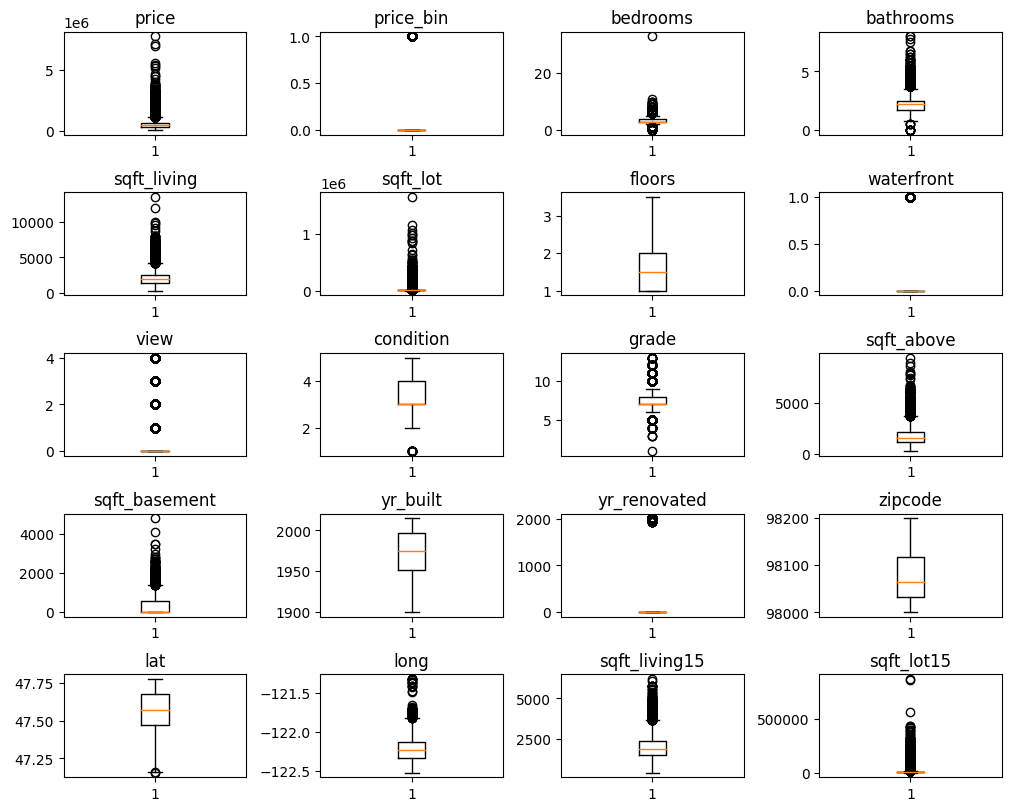

In [14]:
# ...
num_of_features = len(FEATURES_)
num_of_cols = 4
num_of_rows = int(num_of_features / num_of_cols)
current_feature = 0

# ...
fig = plt.figure(figsize=(10,8), constrained_layout=True, dpi=100)
spec = gridspec.GridSpec(nrows=num_of_rows, ncols=num_of_cols, figure=fig)


for r in range(num_of_rows):
    for c in range(num_of_cols):
        ax1 = fig.add_subplot(spec[r, c])
        ax1.set_title('{}'.format(FEATURES_[current_feature]))
        ax1.boxplot(df[FEATURES_[current_feature]].values)

        # ...
        current_feature = current_feature + 1


# ...
plt.show();

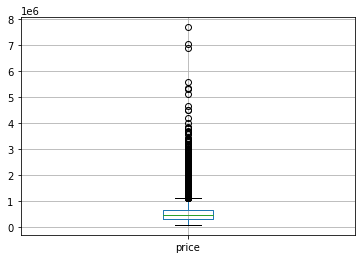

In [15]:
df.boxplot(column=['price'])

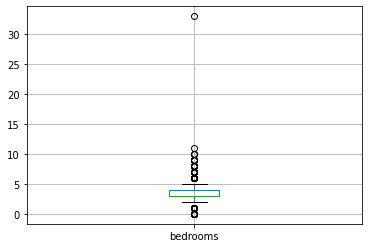

In [16]:
df.boxplot(column=['bedrooms'])

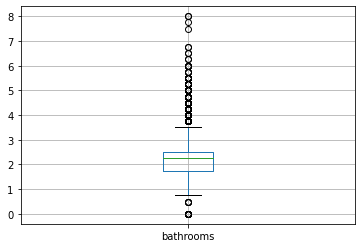

In [17]:
df.boxplot(column=['bathrooms'])

/home/salem/WorkSpaces/python/machine-learning/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


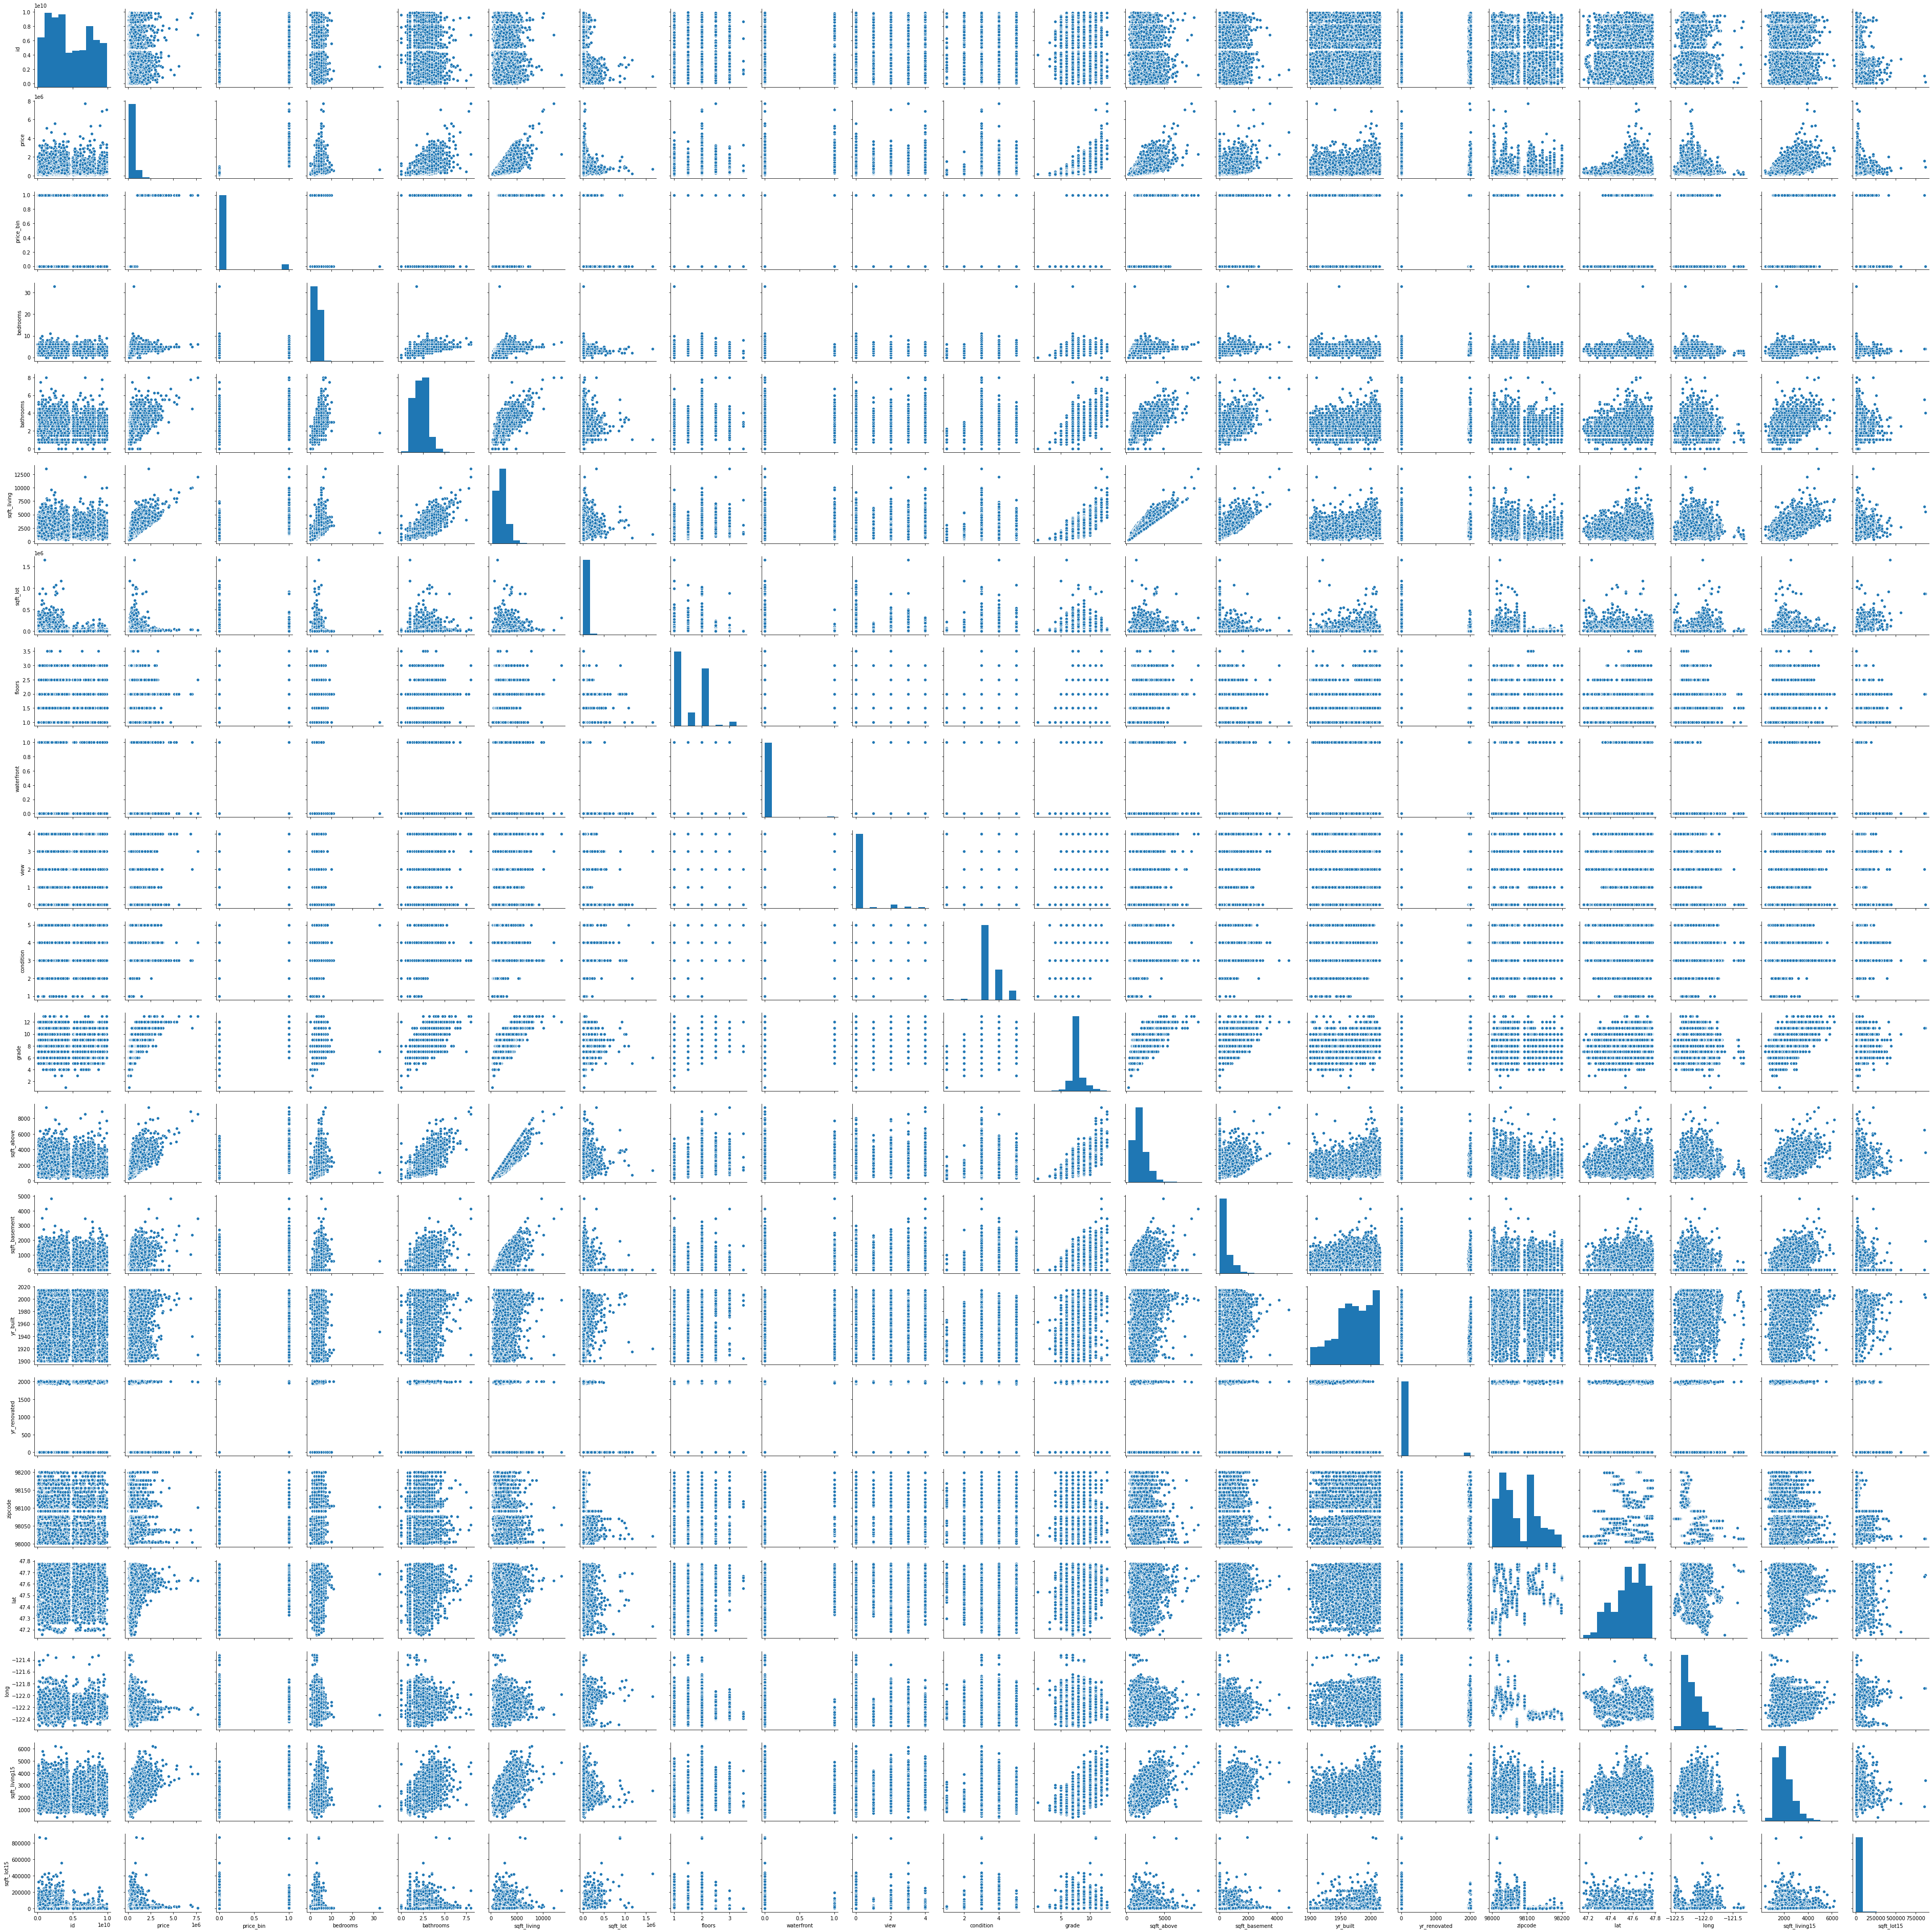

In [18]:
sns.pairplot(df, size=2.5)

plt.tight_layout();
#plt.savefig('./imgs/data_visualisation.png', dpi=300);

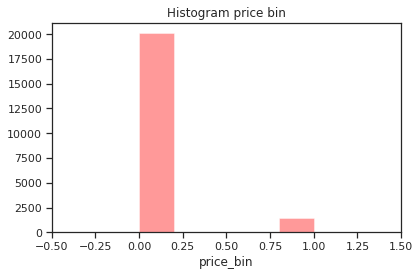

In [19]:
sns.set(style="ticks", color_codes=True)
sns.distplot(df.price_bin, color='red', kde=False, bins=5)

plt.title('Histogram price bin')
plt.xlim(-0.5, 1.5)
plt.tight_layout();

# plt.savefig('./imgs/barplot_price_bin.png', dpi=300);

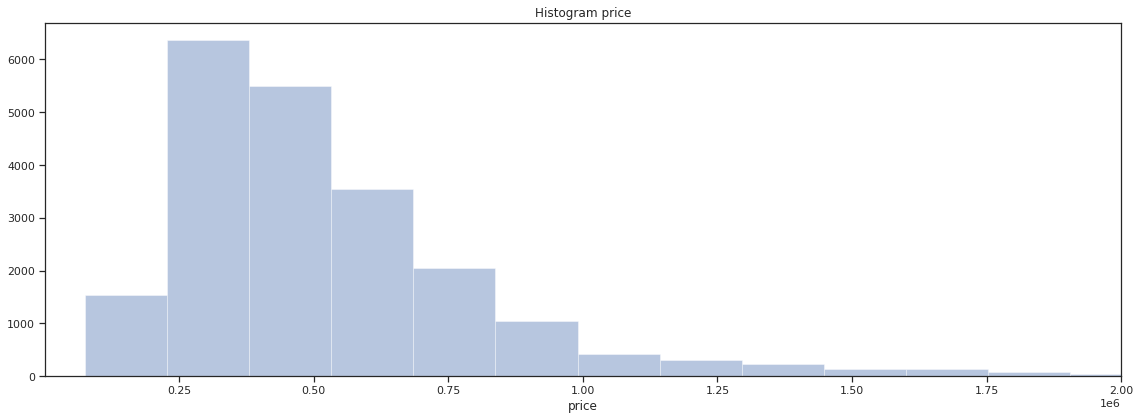

In [20]:
plt.figure(figsize=(16, 6))

sns.set(style="ticks", color_codes=True)
sns.distplot(df.price, kde=False)

plt.xlim(100, 2000000)
plt.title('Histogram price');
plt.tight_layout();

# plt.savefig('./imgs/barplot_price.png', dpi=300);

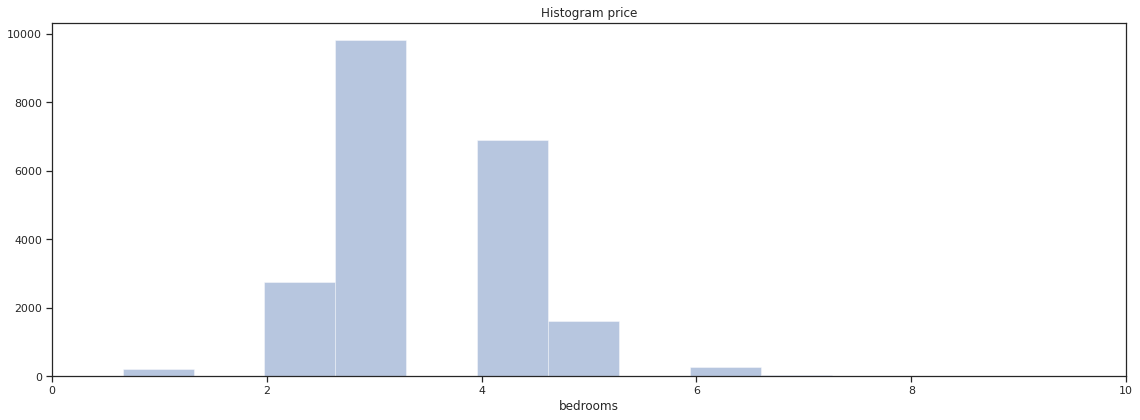

In [21]:
plt.figure(figsize=(16, 6))

sns.set(style="ticks", color_codes=True)
sns.distplot(df.bedrooms, kde=False)

plt.xlim(0, 10)
plt.title('Histogram price');
plt.tight_layout();

# plt.savefig('./imgs/barplot_price.png', dpi=300);

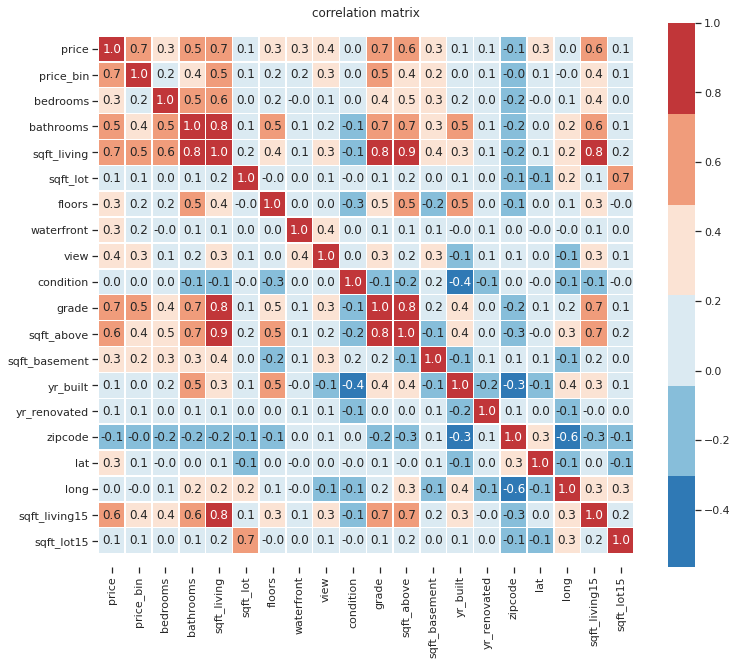

In [22]:
d = df[FEATURES_]


f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(
    d.corr(),
    annot=True,
    fmt='.1f',
    linewidths=.5,
    ax=ax,
    cmap=sns.color_palette("RdBu_r", 6)
)


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.title('correlation matrix');
#plt.savefig('./imgs/macierz_korelacji_między_cechami.png', dpi=300);

# Data processing

In [32]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.base import BaseEstimator, TransformerMixin


## Train/Test split

In [240]:
df_ = df.sort_values(by='date')
# df_ = df_[FEATURES_]
df_.head(5)

id       date     price  price_bin  bedrooms  bathrooms  \
16768  5561000190 2014-05-02  437500.0          0         3       2.25   
9596    472000620 2014-05-02  790000.0          0         3       2.50   
9587   1024069009 2014-05-02  675000.0          0         5       2.50   
20602  7853361370 2014-05-02  555000.0          0         4       2.50   
11577  5056500260 2014-05-02  440000.0          0         4       2.25   

       sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
16768         1970     35100     2.0           0  ...      9        1970   
9596          2600      4750     1.0           0  ...      9        1700   
9587          2820     67518     2.0           0  ...      8        2820   
20602         3310      6500     2.0           0  ...      8        3310   
11577         2160      8119     1.0           0  ...      8        1080   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
16768              0      1977             0    98027  47.4635 -121.991   
9596             900      1951             0    98117  47.6833 -122.400   
9587               0      1979             0    98029  47.5794 -122.025   
20602              0      2012             0    98065  47.5150 -121.870   
11577           1080      1966             0    98006  47.5443 -122.177   

       sqft_living15  sqft_lot15  
16768           2340       35100  
9596            2380        4750  
9587            2820       48351  
20602           2380        5000  
11577           1850        9000  

[5 rows x 22 columns]

In [243]:
# ...
# train_set, test_set = train_test_split(df_, test_size=0.2, random_state=42)


# ...
X = df_.drop('price_bin', axis = 1)
#You can covert the target variable to numpy 
y = df_['price_bin'].values 


# ...
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 42 )

In [244]:
X_train =  train_set.drop('price_bin', axis=1)
X_train.shape

(17290, 21)

In [245]:
y_train =  train_set['price_bin'].values
y_train.shape

(17290,)

In [246]:
X_test =  test_set.drop('price_bin', axis=1)
X_test.shape

(4323, 21)

In [247]:
y_test =  test_set['price_bin'].values
y_test.shape

(4323,)

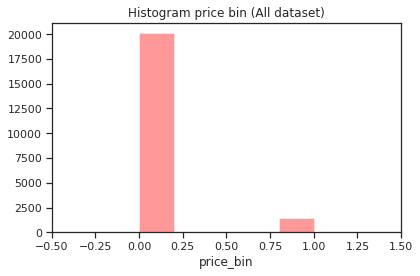

In [248]:
plot_hist(df_, 'price_bin', title='Histogram price bin (All dataset)')

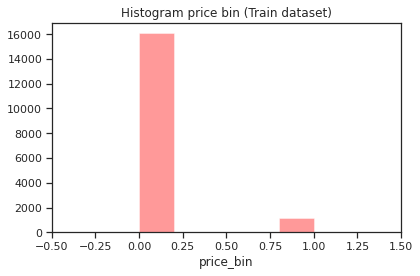

In [249]:
plot_hist(train_set, 'price_bin', title='Histogram price bin (Train dataset)')

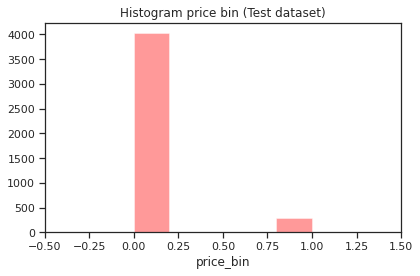

In [250]:
plot_hist(test_set, 'price_bin', title='Histogram price bin (Test dataset)')

In [251]:
# Create a class to select numerical or categorical columns
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values


class DataFrameRemoveFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_remove=[], verbose=False):
        self.features_to_remove = features_to_remove
        self.verbose = verbose

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.verbose:
            print(X)
        if self.features_to_remove:
            return X.drop(self.features_to_remove, axis=1).values
        return X.values


class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ] 


In [253]:
numerical_features = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'
]

num_pipline = Pipeline(
    steps = [
        #('feature_to_remove', DataFrameRemoveFeatures(FEATURES_TO_REMOVE)),
        ('num_selector', FeatureSelector(numerical_features)),
        ('min_max_scaler', MinMaxScaler()),
    ]
)

num_pipline

Pipeline(steps=[('num_selector', FeatureSelector(feature_names=None)),
                ('min_max_scaler', MinMaxScaler())])

In [254]:
# cateforical_features = []
# cat_pipline = Pipeline([
#     ('cat_selector', FeatureSelector(cateforical_features)),
# ])
# cat_pipline

In [255]:
processing_full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipline),
#     ("cat_pipeline", cat_pipeline),
])
processing_full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('num_selector',
                                                 FeatureSelector(feature_names=None)),
                                                ('min_max_scaler',
                                                 MinMaxScaler())]))])

<img src="https://iaml.it/blog/optimizing-sklearn-pipelines/images/pipeline-diagram.png" />

<img src="https://miro.medium.com/max/496/1*b0rUb-3fH6bpvwVpHrcFUQ.png"/>

# Select and train a model

### Logistic Regression

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix


In [258]:
#The full pipeline as a step in another pipeline with an estimator as the final step
full_pipeline_logistic_regression = Pipeline(
    steps = [ 
        ('processing_full_pipeline', processing_full_pipeline),
        ('model', LogisticRegression() ) 
    ]
)

In [276]:
#Can call fit on it just like any other pipeline
_ = full_pipeline_logistic_regression.fit( X_train, y_train )

In [279]:
train_score = full_pipeline_logistic_regression.score(X_train, y_train)
test_score = full_pipeline_logistic_regression.score(X_test, y_test)

print('Train accuracy: {}%'.format(round(train_score * 100, 2)))
print('Test accuracy: {}%'.format(round(test_score * 100, 2)))

Train accuracy: 96.31%
Test accuracy: 96.09%


In [275]:
#Can predict with it like any other pipeline
y_pred = full_pipeline_logistic_regression.predict(X_test)

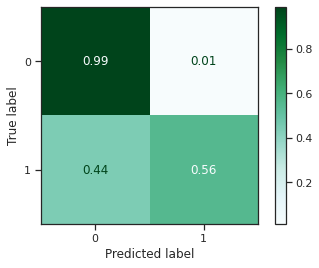

In [283]:
plot_confusion_matrix(
    full_pipeline_logistic_regression, 
    X_test,
    y_test,
    cmap="BuGn",
    normalize='true',
#     ax=ax6
);

# Pipeline factory

In [332]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self._feature_names ] 


class PiplineFactory:
    def __init__(self, numerical_features, cat_features, model):
        self.numerical_features = numerical_features
        self.cat_features = cat_features
        self.model = model

    def get_num_pipeline(self):
        return Pipeline(
            steps = [
                ('num_selector', FeatureSelector(self.numerical_features)),
                ('min_max_scaler', MinMaxScaler()),
            ]
        )

    def get_cat_pipeline(self):
        ...

    def get_processing_full_pipeline(self):
        return FeatureUnion(
            transformer_list = [
                ("num_pipeline", self.get_num_pipeline()),
#                 ("cat_pipeline", self.get_cat_pipeline()),
            ]
        )

    def get_full_pipline(self):
        return Pipeline(
            steps = [ 
                ('processing_full_pipeline', self.get_processing_full_pipeline()),
                ('model', self.model ) 
            ]
        )

    
def metrics_(pipline, X_tr, X_te, y_tr, y_te):
    # ...
    train_score = pipline.score(X_tr, y_tr)
    test_score = pipline.score(X_te, y_te)
    print('Train accuracy: {}%'.format(round(train_score * 100, 2)))
    print('Test accuracy: {}%'.format(round(test_score * 100, 2)))


    # ...
    plot_confusion_matrix(
        pipline, 
        X_te,
        y_te,
        cmap="BuGn",
        normalize='true',
    );

In [337]:
numerical_features = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'
]


cat_features = []

## Ex. 1

Train accuracy: 96.31%
Test accuracy: 96.09%


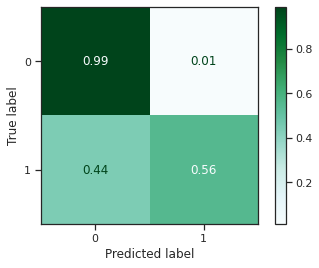

In [338]:
from sklearn.linear_model import LogisticRegression

# ...
full_pipline_m_1 = PiplineFactory(
    numerical_features=numerical_features,
    cat_features=cat_features,
    model=LogisticRegression()
).get_full_pipline()


# ...
df_ = pd.read_csv(os.path.join(PATH_TO_DATA, 'housing', '2', 'house.csv'))
df_ = df.sort_values(by='date')
X_ = df_.drop('price_bin', axis = 1)
#You can covert the target variable to numpy 
y_ = df_['price_bin'].values 


# ...
X_train_, X_test_, y_train_, y_test_ = train_test_split( X, y , test_size = 0.2 , random_state = 42 )

# ...
full_pipline_m_1.fit(X_train_, y_train_)

# ...
metrics_(full_pipline_m_1, X_train_, X_test_, y_train_, y_test_)

## Ex. 2

Train accuracy: 99.99%
Test accuracy: 96.99%


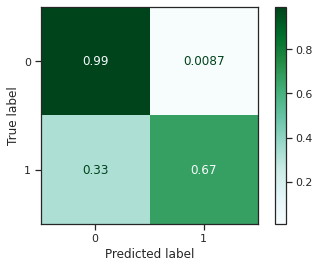

In [339]:
from sklearn.ensemble import RandomForestClassifier

# ...
full_pipline_m_2 = PiplineFactory(
    numerical_features=numerical_features,
    cat_features=cat_features,
    model=RandomForestClassifier() 
).get_full_pipline()


# ...
df_ = pd.read_csv(os.path.join(PATH_TO_DATA, 'housing', '2', 'house.csv'))
df_ = df.sort_values(by='date')
X_ = df_.drop('price_bin', axis = 1)
#You can covert the target variable to numpy 
y_ = df_['price_bin'].values 


# ...
X_train_, X_test_, y_train_, y_test_ = train_test_split( X, y , test_size = 0.2 , random_state = 42 )

# ...
full_pipline_m_2.fit(X_train_, y_train_)

# ...
metrics_(full_pipline_m_2, X_train_, X_test_, y_train_, y_test_)

## Summary
...

## What Next ?

1. What is best practice to make prediction for binary set?
2. In binary prediction we should use Date? if yes how?
3. How to split data if we have date?
4. add pipline with multi model
5. select the best model and params

https://pbiecek.github.io/xai_stories/story-house-sale-prices.html

## Resources


### Books
0. [[1.0.] ...](#)
1. [[1.1.] Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems](https://github.com/ageron/handson-ml)

### Papers
0. [[2.0.] ...](#)


### Web
0. [[3.0.] ...](#)
1. [[3.1.] Pandas visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
2. [[3.2.] Handon-ml](https://github.com/ageron/handson-ml)
3. [[3.3.] ML Pipline more examples 1](https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65)
4. [[3.4.] ML Pipline more examples 2](https://michelleful.github.io/code-blog/2015/06/20/pipelines/)


### Images
0. [[4.0.] ...](#)